# Implementation of Lasso and Ridge Regression using Diamond Dataset and comparing it with Linear Regression

In [1]:
# import the necessary libraries
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

# Machine Learning and Metrics Libraries

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# load the Boston housing dataset


In [2]:
# Read the dataset
df = pd.read_csv("diamonds.csv")

# Taking a random sample of 1000 observations from the dataset
df = df.sample(n=500, random_state=69)
df.head()

,carat,depth,table,price,Vol,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
47803,0.660,62.800,57.000,1901,107.692,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
25068,1.060,61.900,56.000,13588,172.005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
518,0.740,63.100,58.000,2824,119.270,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5135,1.000,64.000,53.000,3763,160.853,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
21753,1.500,61.000,60.000,9820,237.136,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# Data Description

#### The dataset contains 53940 observations and 10 variables and after preprocessing and sampling we are going to use 500 observations and 22 features.

> #### **carat** - The weight of the diamond (0.2--5.01)
> #### **cut** - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
> #### **color** - Color of the diamond, with D being the best and J the worst
> #### **clarity** - A measurement of how clear the diamond is
> #### **depth** - The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
> #### **table** - The width of the diamond's table expressed as a percentage of its average diameter
> #### **x** - Length in mm
> #### **y** - Width in mm
> #### **z** - Depth in mm
> #### **price** - The price of the diamond

In [36]:
# Taking a random sample of 1000 observations from the dataset

df = df.sample(n=500, random_state=69)

df.head()

,carat,depth,table,price,Vol,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
25966,1.510,66.000,57.000,15152,238.589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23287,2.010,63.000,56.000,11312,323.594,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
15696,0.290,62.800,54.000,607,47.304,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7325,0.900,61.300,60.000,4209,143.665,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
26135,1.610,62.900,56.000,15426,264.227,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [4]:
# Checking the correlation of feature with the target variable
df.corr()["price"].sort_values(ascending=False)

price            1.000
Vol              0.898
carat            0.895
cut_Premium      0.103
clarity_SI2      0.094
table            0.086
cut_Good         0.056
color_I          0.047
depth            0.041
clarity_VS2      0.036
color_H          0.033
color_J          0.033
color_G          0.025
clarity_SI1      0.011
clarity_VS1     -0.019
color_F         -0.022
cut_Very Good   -0.032
color_E         -0.050
clarity_VVS2    -0.070
clarity_IF      -0.071
clarity_VVS1    -0.087
cut_Ideal       -0.130
Name: price, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"], axis=1)
y = df["price"]

# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression

Linear Regression RMSE:  1189.8983418348355
Linear Regression R2 score 0.863705511798364
Linear Regression Coefficients:  [ 7.53104069e+01  4.01894521e+00 -8.10686768e+00  5.63641569e+01
  1.75219576e+02  2.26188616e+02  3.28047317e+02  2.60313168e+02
 -1.70725987e+02 -3.07074717e+02 -5.69809211e+02 -1.28825743e+03
 -1.62796170e+03 -2.30808755e+03  7.62316092e+03  5.66339031e+03
  4.33949001e+03  6.68447834e+03  6.54699223e+03  7.42987140e+03
  7.41246087e+03]
Linear Regression Intercept:  -8832.147252851688


<Axes: xlabel='price'>

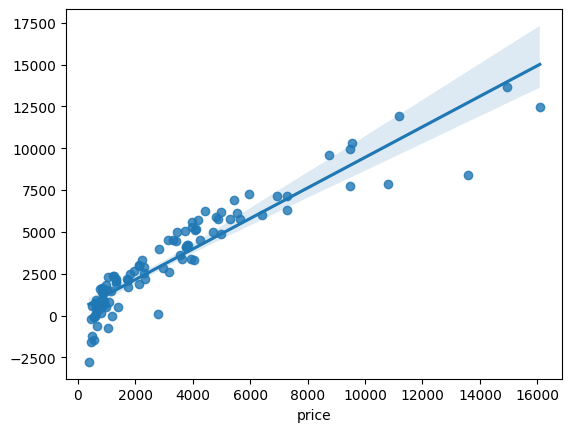

In [6]:
# Applying Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions) ** 0.5
print("Linear Regression RMSE: ", lr_mse)
print("Linear Regression R2 score", r2_score(y_test, lr_predictions))
print("Linear Regression Coefficients: ", lr.coef_)
print("Linear Regression Intercept: ", lr.intercept_)


sns.regplot(x=y_test, y=lr_predictions, fit_reg=True)

# Lasso Regression

alpha:  0.1
coefficients:  [ 4037.97630722   -21.09734662   -17.75569653    31.94877419
   242.23913135   327.17597904   432.48649663   366.38082449
  -173.9486133   -306.26877091  -581.30510119 -1302.03483889
 -1619.98601999 -2334.10943861  7670.32402421  5695.7032877
  4371.60431648  6733.24143597  6588.13125687  7471.14859353
  7446.75849157]
intercept:  -6849.394879884474
R2 Score:  0.864097983663747
RMSE:  1188.1838986981445
----------------------------------------------------
alpha:  0.2
coefficients:  [ 3643.20285465   -19.35782991   -17.09013204    34.34867524
   223.17625816   303.640342     407.78399006   342.05691121
  -167.65740234  -300.30422915  -575.58439067 -1293.75593251
 -1615.36240165 -2324.23839747  7614.72092946  5646.90116011
  4323.35220577  6681.82411331  6538.03206649  7418.78926289
  7394.94763702]
intercept:  -6924.624918873782
R2 Score:  0.8645190133551592
RMSE:  1186.3419511988054
----------------------------------------------------
alpha:  0.30000000000000

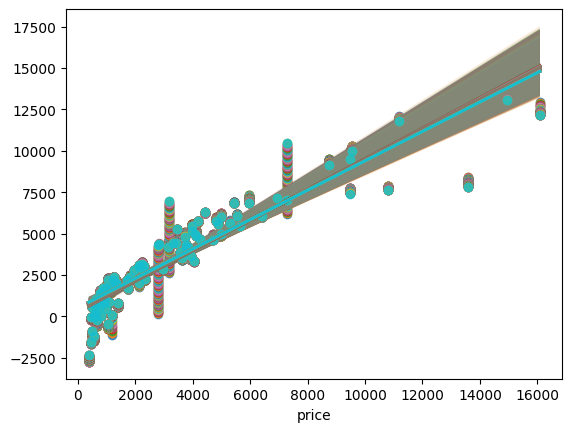

In [28]:
# Apply Lasso Regression and print the coefficients and the intercept of the model
r2_lasso = {}
for aplha in np.linspace(0.1, 10, 100):
    lasso = Lasso(alpha=aplha)
    lasso.fit(X_train, y_train)
    print("alpha: ", aplha)
    print("coefficients: ", lasso.coef_)
    print("intercept: ", lasso.intercept_)
    print("R2 Score: ", r2_score(y_test, lasso.predict(X_test)))
    r2_lasso[aplha] = r2_score(y_test, lasso.predict(X_test))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
    print("----------------------------------------------------")
    sns.regplot(x=y_test, y=lasso.predict(X_test))

# Ridge Regression

alpha:  0.1
coefficients:  [-5.18554905e+02  1.10319324e+01 -5.99978052e+00  5.96742125e+01
  2.69394884e+02  3.18645353e+02  3.98918432e+02  3.44819443e+02
 -1.58027621e+02 -2.90230664e+02 -5.69653866e+02 -1.25676421e+03
 -1.62813598e+03 -2.29006539e+03  6.86534125e+03  4.97244232e+03
  3.66789388e+03  5.97823924e+03  5.84995688e+03  6.70619192e+03
  6.68447078e+03]
intercept:  -8745.970451803223
R2:  0.8691693515754326
RMSE:  1165.8037814068643
----------------------------------------------------
alpha:  0.2
coefficients:  [-6.09464015e+02  1.36475087e+01 -5.50610193e+00  5.99492430e+01
  3.42798437e+02  3.93101838e+02  4.56810820e+02  4.13705079e+02
 -1.46187002e+02 -2.74955007e+02 -5.68468709e+02 -1.23075418e+03
 -1.62470384e+03 -2.27360321e+03  6.26400041e+03  4.42511326e+03
  3.13629381e+03  5.41990868e+03  5.29837786e+03  6.13234123e+03
  6.10694963e+03]
intercept:  -8429.8197155751
R2:  0.8718293840129284
RMSE:  1153.891431770473
------------------------------------------------

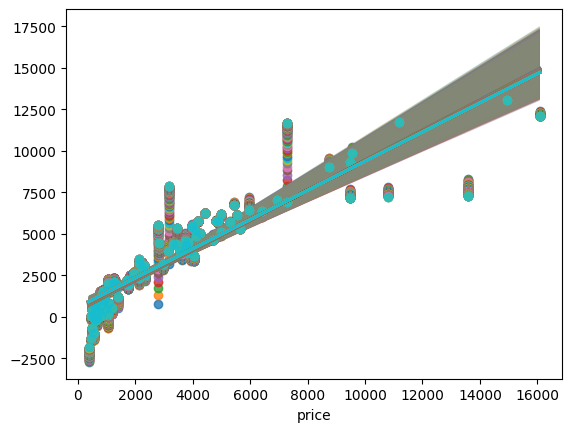

In [29]:
# apply L2 regression and print the coefficients as they will shrink
r2_ridge = {}
for alpha in np.linspace(0.1, 10, 100):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alpha: ", alpha)
    print("coefficients: ", ridge.coef_)
    print("intercept: ", ridge.intercept_)
    print("R2: ", r2_score(y_test, ridge.predict(X_test)))
    r2_ridge[alpha] = r2_score(y_test, ridge.predict(X_test))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
    print("----------------------------------------------------")
    sns.regplot(x=y_test, y=ridge.predict(X_test))


In [30]:
r2_values = pd.DataFrame([r2_lasso, r2_ridge]).T
r2_values.reset_index(inplace=True)
r2_values.columns = ['Alpha',"Lasso", "Ridge"]

In [31]:
r2_values

,Alpha,Lasso,Ridge
0,0.100,0.864,0.869
1,0.200,0.865,0.872
2,0.300,0.865,0.873
3,0.400,0.865,0.873
4,0.500,0.865,0.872
...,...,...,...
95,9.600,0.849,0.824
96,9.700,0.849,0.823
97,9.800,0.848,0.823
98,9.900,0.847,0.823


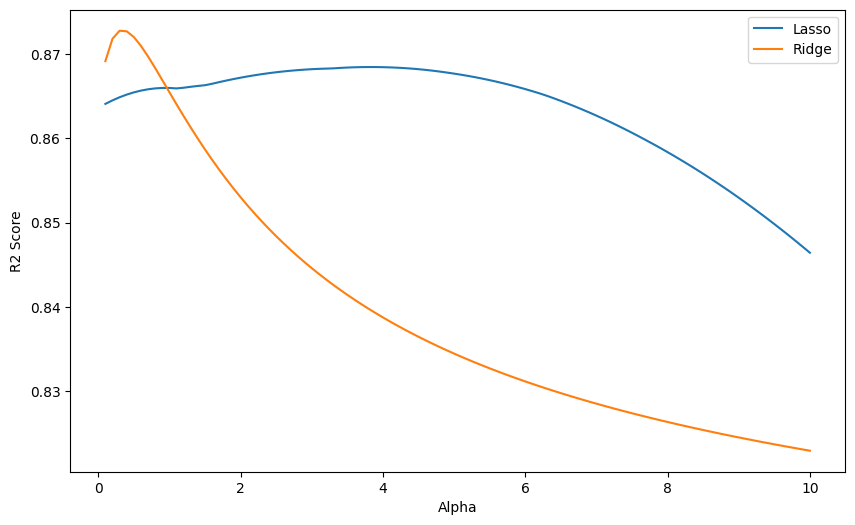

In [32]:
# Plot the R2 scores for both Lasso and Ridge with respect to alpha

plt.figure(figsize=(10, 6))
plt.plot(list(r2_lasso.keys()), list(r2_lasso.values()), label="Lasso")
plt.plot(list(r2_ridge.keys()), list(r2_ridge.values()), label="Ridge")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.legend()
plt.show()

In [33]:
# Making a Data Frame for thhe RMSE, Bias and Variance for Linear Regression, Lasso and Ridge Regression

compare_df=pd.DataFrame({"RMSE":[],"Bias":[],"Variance":[]})

# Making list of model names and their objects
model_names = [("Linear Regression", lr), ("Lasso Regression", lasso), ("Ridge Regression", ridge)]

for name, model in model_names:
    # Calculating the Bias and Variance
    mse, bias, var = bias_variance_decomp(
        model,
        X_train.values,
        y_train.values,
        X_test.values,
        y_test.values,
        loss="mse",
        num_rounds=200,
        random_seed=1,
    )
    # Calculating the RMSE
    rmse = np.sqrt(mse)
    # Appending the results to the compare_df
    compare_df = compare_df.append(
        pd.DataFrame(
            {"RMSE": rmse, "Bias": bias, "Variance": var}, index=[name]
        )
    )



In [34]:
compare_df

,RMSE,Bias,Variance
Linear Regression,1274.561,1417112.847,207393.395
Lasso Regression,1299.602,1567658.190,121307.771
Ridge Regression,1396.802,1856490.812,94564.315
